In [3]:
# importing dependencies

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [4]:
# reading ccsv
df = pd.read_csv("./crypto_data.csv", index_col=0)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
# List all algo in use

algo =set(df["Algorithm"].values)



In [7]:
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [11]:
# Select only crypto that are being traded

traded_df = df.loc[df["IsTrading"] == True]
traded_df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [14]:
#Delete the IsTrading column it is no longer needed

df = traded_df.drop("IsTrading", axis=1)
# OR  df = traded_df[["CoinName", "Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply"]]

df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
# Delete all eow with null values

df = df.dropna(axis=0, how="any")
df.shape

(685, 5)

In [19]:
#Sort value Total Coined MIned to identify Negative or zero value

df["TotalCoinsMined"].sort_values()


FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [22]:
df = df[df["TotalCoinsMined"] > 0]
len(df)

532

In [23]:
df = df.drop("CoinName", axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [27]:
# Created my X features list (columns) and target y values

X = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [30]:
X_scaled.shape

(532, 98)

## Reducing dataset dimension with PCA


In [31]:
#Reduce dimension with PCA
pca = PCA(n_components=.90)
principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(532, 74)

In [33]:
#The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.4728345756615

In [37]:
#Reduce dimension with t-SNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

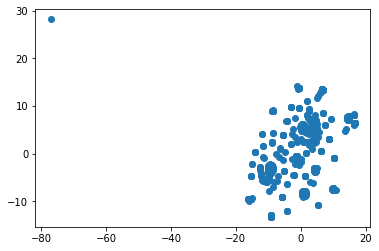

In [38]:
#plot t-SNE output

X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X,y)
plt.show()

In [39]:
#Identify cluster with k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)
    

C:\Users\Shailza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


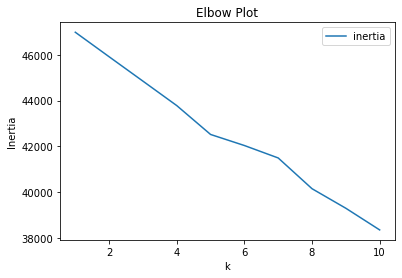

In [40]:
elbow_df = pd.DataFrame({"k":k, "inertia":inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Plot")
plt.show()

# Conclusions

Both t-SNE and an elbow plot using kmeans suggest that there are no meaningful clusters found in the dataset